# MIS 637 - Final Project (Group 3)

In [13]:
################################
# Import the libraries
################################

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from scipy.stats import f_oneway
from sklearn.metrics import classification_report,precision_score, recall_score,f1_score

from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn import tree
import graphviz as gv
#pip install pydotplus
import pydotplus
from IPython.display import Image
import seaborn as sns
# from sklearn.tree import export_graphviz
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.metrics import confusion_matrix

In [9]:
# Loan_ID					Unique Loan ID
# Gender					Male/ Female
# Married					Applicant married (Y/N)
# Dependents				Number of dependents
# Education					Applicant Education (Graduate/ Under Graduate)
# Self_Employed				Self employed (Y/N)
# ApplicantIncome			Applicant income
# CoapplicantIncome			Coapplicant income
# LoanAmount				Loan amount in thousands
# Loan_Amount_Term			Term of loan in months
# Credit_History			(1- has all debts paid, 0- not paid)
# Property_Area				Urban/ Semi Urban/ Rural
# Loan_Status				(Target) Loan approved (Y/N)


# Logistic Regression

In [16]:
def logistic_regression(df, drop_nulls, drop_columns_list, cap_outliers_list, prop_area_convert):
    
    main_df = df.copy()
    
    def fn_drop_columns(df, columns):
        
        print("drop columns : ", columns)
        for i in columns:
            df = df.drop(columns = [i], axis=1)
        return df
            
    def fn_cap_outliers(df, columns):
        #cap outliers
        print("cap outliers : ", columns)
        for j in columns:
            q1 = df[j].quantile(0.25)
            q3 = df[j].quantile(0.75)
            IQR = q3-q1
            upper_limit = df[j][~(df[j]>(q3+1.5*IQR))].max()
            lower_limit = df[j][~(df[j]>(q1-1.5*IQR))].min()
            df[j] = np.where(df[j] > upper_limit, upper_limit, np.where(df[j]<lower_limit, lower_limit, df[j]))
            
        return df
    
    def fn_property_area_convert(df):
        #Convert proper_area into binary of semiurban or not as as a new variable
        print("treat the property area ")
        positive = ['Semiurban']
        negative = ['Rural', 'Urban']
        df["Semiurban"] = df["Property_Area"].isin(positive).astype(int)
        return df

    
    if prop_area_convert == True:
        main_df = fn_property_area_convert(main_df)
    
    if len(drop_columns_list) > 0:
        main_df = fn_drop_columns(main_df, drop_columns_list)
        
    if len(cap_outliers_list) > 0:
        main_df = fn_cap_outliers(main_df, cap_outliers_list)
        
    if drop_nulls == True:
        main_df = main_df.dropna()
    
        
    X = main_df.drop("Loan_Status", axis=1)
    y = main_df["Loan_Status"]
    
    X = pd.get_dummies(X, drop_first=True)
    
    # Training the dataset : training (60%) and validation (40%)
    # What should be the split ?????
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)
    
    # Logistic Regression model
    model = LogisticRegression()

    # Fit it into the training data
    model.fit(X_train, y_train)
    
    #find intercept and coefficients
    weight = model.coef_
    intercept = model.intercept_

    # Predictions on the data
    y_pred = model.predict(X_test)

    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label = 'Y')
    recall = recall_score (y_test, y_pred, pos_label = 'Y')
    f1 = f1_score (y_test, y_pred,pos_label = 'Y')

    X.info()
    print(f"Model intercept is: {intercept}")
    print(f"Model coefficients are: {weight}")
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"f1: {f1_score}")

    print(classification_report(y_test, y_pred))
    
    model_score = model.score(X_train, y_train)
    print(f"model_score: {model_score}")
    
    # Create the confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    print(cm)
    color = 'white'
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
    disp.plot()
    plt.show()
    
#     print(main_df.info())
    

treat the property area 
drop columns :  ['Loan_ID', 'Gender', 'Self_Employed', 'Dependents', 'Property_Area']
<class 'pandas.core.frame.DataFrame'>
Int64Index: 527 entries, 1 to 613
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   ApplicantIncome         527 non-null    int64  
 1   CoapplicantIncome       527 non-null    float64
 2   LoanAmount              527 non-null    float64
 3   Loan_Amount_Term        527 non-null    float64
 4   Credit_History          527 non-null    float64
 5   Semiurban               527 non-null    int64  
 6   Married_Yes             527 non-null    uint8  
 7   Education_Not Graduate  527 non-null    uint8  
dtypes: float64(4), int64(2), uint8(2)
memory usage: 29.8 KB
Model intercept is: [0.09925374]
Model coefficients are: [[ 5.32048395e-06 -5.15330645e-05 -1.11870002e-03 -4.69686502e-03
   2.72599431e+00  8.45332640e-01  4.61999111e-02 -6.15479752e-01]]
Acc

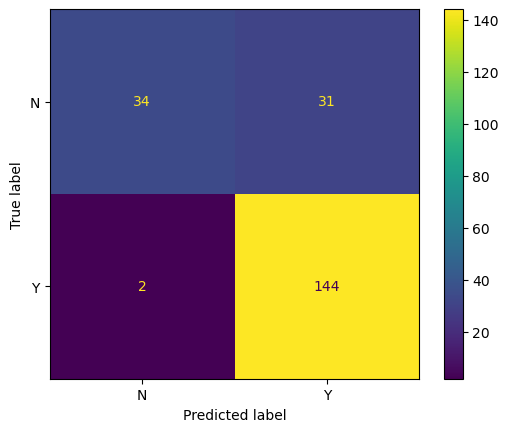

In [17]:
# Load the data
main_loan_df = pd.read_csv('Loan_Data.csv')

# copying data to new variables 
loan_df = main_loan_df.copy()

drop_nulls = True
drop_columns_list = ['Loan_ID', 'Gender', 'Self_Employed', 'Dependents', 'Property_Area']
cap_outliers_list = [] #['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']
prop_area_convert = True

logistic_regression(loan_df, drop_nulls, drop_columns_list, cap_outliers_list, prop_area_convert)


# Decision Tree

In [2]:
def decision_tree(df, drop_nulls, drop_columns_list, cap_outliers_list, prop_area_convert):
    
    main_df = df.copy()
    
    def fn_drop_columns(df, columns):
        
        print("drop columns : ", columns)
        for i in columns:
            df = df.drop(columns = [i], axis=1)
        return df
            
    def fn_cap_outliers(df, columns):
        #cap outliers
        print("cap outliers : ", columns)
        for j in columns:
            q1 = df[j].quantile(0.25)
            q3 = df[j].quantile(0.75)
            IQR = q3-q1
            upper_limit = df[j][~(df[j]>(q3+1.5*IQR))].max()
            lower_limit = df[j][~(df[j]>(q1-1.5*IQR))].min()
            df[j] = np.where(df[j] > upper_limit, upper_limit, np.where(df[j]<lower_limit, lower_limit, df[j]))
            
        return df
    
    def fn_property_area_convert(df):
        #Convert proper_area into binary of semiurban or not as as a new variable
        print("treat the property area ")
        positive = ['Semiurban']
        negative = ['Rural', 'Urban']
        df["Semiurban"] = df["Property_Area"].isin(positive).astype(int)
        return df

    
    if prop_area_convert == True:
        main_df = fn_property_area_convert(main_df)
    
    if len(drop_columns_list) > 0:
        main_df = fn_drop_columns(main_df, drop_columns_list)
        
    if len(cap_outliers_list) > 0:
        main_df = fn_cap_outliers(main_df, cap_outliers_list)
        
    if drop_nulls == True:
        main_df = main_df.dropna()
        
    X = main_df.drop("Loan_Status", axis=1)
    y = main_df["Loan_Status"]
    
    X = pd.get_dummies(X, drop_first=True)
    

    # Split the data into 80% training and 20% testing sets, stratifying on the target variable, and using a fixed random state for reproducibility
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

    # Create a DecisionTreeClassifier instance
    tree_clf = DecisionTreeClassifier(random_state=42)

    # Train the decision tree on the training data
    tree_clf.fit(X_train, y_train)

    # Make predictions on the training data
    y_pred = tree_clf.predict(X_test)
    
    # Accuracy
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, pos_label = 'Y')
    recall = recall_score (y_test, y_pred, pos_label = 'Y')
    f1 = f1_score (y_test, y_pred,pos_label = 'Y')
    
    print(f"Accuracy: {accuracy}")
    print(f"Precision: {precision}")
    print(f"Recall: {recall}")
    print(f"f1: {f1_score}")

    print(classification_report(y_test, y_pred))
    
    model_score = tree_clf.score(X_train, y_train)
    print(f"model_score: {model_score}")

#     Calculate and print the accuracy and F1 score on the training data
#     print("Training Data Set Accuracy: ", accuracy_score(y_train, y_pred))
#     print("Training Data F1 Score ", f1_score(y_train, y_pred, pos_label = 'Y'))
    
#     # Calculate and print the mean F1 score and mean accuracy using 5-fold cross-validation on the training data
#     print("Validation Mean F1 Score: ", cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='f1_macro').mean())
#     print("Validation Mean Accuracy: ", cross_val_score(tree_clf, X_train, y_train, cv=5, scoring='accuracy').mean())


    # Export the decision tree to DOT format
    dot_data = tree.export_graphviz(tree_clf, feature_names=X.columns.tolist())

    # Create a Graphviz source object from the DOT data and render decision tree
    graph = gv.Source(dot_data)
    #graph
    #graph.render('graph')  # Save the graph to a file
    #gv.Source(graph).view() # to see the graph
    
    ####################
    # Pruning
    ####################
    # Initialize lists to store training and validation accuracy, F1 scores, and tree depths
    accuracy_list = []
    precision_list = []
    recall_list = []
    fl_list = []
    tree_depths = []

    ######################
    # Train on 1 depth
    ######################
    pruned_clf = DecisionTreeClassifier(random_state=42, max_depth=5)
    pruned_clf.fit(X_train, y_train)

    # Generate the graph visualization of the pruned decision tree
    dot_data_pruned = tree.export_graphviz(pruned_clf, feature_names=X.columns.tolist())
    graph_pruned = gv.Source(dot_data_pruned)
    gv.Source(graph_pruned).view() # to see the graph
        

    ######################
    # Train on 1-20 depth
    ######################
    # Train and evaluate decision tree models with different max_depth values from 1 to 20
    for depth in range(1, 21):

        # Prune the decision tree by setting a maximum depth
        pruned_clf = DecisionTreeClassifier(random_state=42, max_depth=depth)
        pruned_clf.fit(X_train, y_train)

        # Generate the graph visualization of the pruned decision tree
        dot_data_pruned = tree.export_graphviz(pruned_clf, feature_names=X.columns.tolist())
        graph_pruned = gv.Source(dot_data_pruned)
        # gv.Source(graph_pruned).view() # to see the graph


        # Evaluate the pruned decision tree on the test set
        y_pred_pruned = pruned_clf.predict(X_test)
        accuracy_pruned = accuracy_score(y_test, y_pred_pruned)
        precision_pruned = precision_score(y_test, y_pred_pruned, pos_label = 'Y')
        recall_pruned = recall_score (y_test, y_pred_pruned, pos_label = 'Y')
        f1_pruned = f1_score (y_test, y_pred_pruned,pos_label = 'Y')
        
        accuracy_list.append(accuracy_pruned)
        precision_list.append(precision_pruned)
        recall_list.append(recall_pruned)
        fl_list.append(f1_pruned)
        tree_depths.append(depth)

        print("------------------------------------")
        print(f"Depth : {depth}")
        print(f"Accuracy: {accuracy_pruned}")
        print(f"Precision: {precision_pruned}")
        print(f"Recall: {recall_pruned}")
        print(f"f1: {f1_pruned}")

#         print(classification_report(y_test, y_pred_pruned))

        model_score_pruned = pruned_clf.score(X_train, y_train)
        print(f"model_score: {model_score_pruned}")
        
#     # Store the collected metrics and max_depth values in a dictionary and convert it to a DataFrame
#     Tuning_Max_depth = {"Accuracy": accuracy_list, "Precision": precision_list, "recall": recall_list, "F1": fl_list, "Max_Depth": tree_depths}
#     Tuning_Max_depth_df = pd.DataFrame.from_dict(Tuning_Max_depth)

#     # Melt the DataFrame for easy plotting with seaborn
#     plot_df = Tuning_Max_depth_df.melt('Max_Depth', var_name='Metrics', value_name="Values")

#     # Plot the metrics against max_depth to visualize the impact of max_depth on model performance
#     fig, ax = plt.subplots(figsize=(15, 5))
#     sns.pointplot(x="Max_Depth", y="Values", hue="Metrics", data=plot_df, ax=ax)
    



In [3]:
# Load the data
main_loan_df = pd.read_csv('Loan_Data.csv')

# copying data to new variables 
loan_df = main_loan_df.copy()

drop_nulls = True
drop_columns_list = ['Loan_ID', 'Gender', 'Self_Employed', 'Dependents', 'Property_Area']
cap_outliers_list = [] #['ApplicantIncome', 'LoanAmount', 'CoapplicantIncome']
prop_area_convert = True

decision_tree(loan_df, drop_nulls, drop_columns_list, cap_outliers_list, prop_area_convert)

treat the property area 
drop columns :  ['Loan_ID', 'Gender', 'Self_Employed', 'Dependents', 'Property_Area']
Accuracy: 0.7203791469194313
Precision: 0.8129496402877698
Recall: 0.773972602739726
f1: <function f1_score at 0x1376abd30>
              precision    recall  f1-score   support

           N       0.54      0.60      0.57        65
           Y       0.81      0.77      0.79       146

    accuracy                           0.72       211
   macro avg       0.68      0.69      0.68       211
weighted avg       0.73      0.72      0.72       211

model_score: 1.0
------------------------------------
Depth : 1
Accuracy: 0.8388625592417062
Precision: 0.8181818181818182
Recall: 0.9863013698630136
f1: 0.8944099378881987
model_score: 0.7974683544303798
------------------------------------
Depth : 2
Accuracy: 0.8341232227488151
Precision: 0.8135593220338984
Recall: 0.9863013698630136
f1: 0.891640866873065
model_score: 0.8006329113924051
------------------------------------
Depth : 3